## Probability Distributions Exercises

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import env
import os

A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

What is the probability that no cars drive up in the noon hour?

(array([1., 0.]), array([0, 1, 2]), <BarContainer object of 2 artists>)

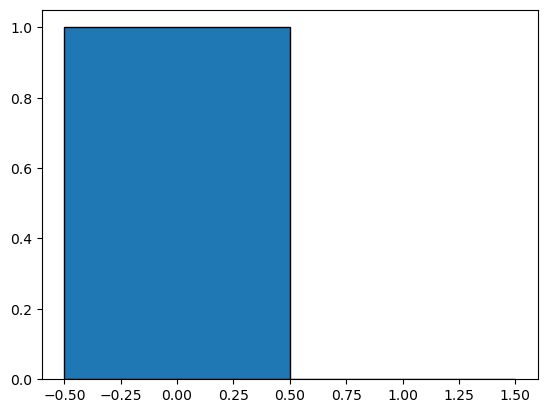

In [24]:
mean = 2
x = stats.poisson(2).pmf(mean)

plt.hist(x, bins=range(0, 3), align='left', width=1, edgecolor='black')


In [61]:
stats.poisson(2).pmf(0)

0.1353352832366127

What is the probability that 3 or more cars come through the drive through?


In [62]:
stats.poisson(2).pmf(3)

0.18044704431548356

How likely is it that the drive through gets at least 1 car?


In [63]:
stats.poisson(2).sf(0)

0.8646647167633873

Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

What grade point average is required to be in the top 5% of the graduating class?



In [87]:
nm = 3.0
sd = .3

gpa = stats.norm(nm, sd)

In [91]:
gpa.isf(.05)

3.4934560880854417

What GPA constitutes the bottom 15% of the class?


In [90]:
gpa.ppf(.15)

2.689069983151863

An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?


In [94]:
gpa.pdf(2.8)

1.0648266850745072

If I have a GPA of 3.5, what percentile am I in?


In [96]:
gpa.sf(3.5)

0.0477903522728147

In [98]:
gpa.cdf(3.5)

0.9522096477271853

A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?



In [109]:
stats.binom(4326, .02).sf(96)

0.13975823631416448

You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

What is the probability that at least one of your first 60 answers is correct?


In [110]:
stats.binom(60, .01).sf(0)

0.45284335760923855

The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?



In [24]:
# 3% chance someone cleans up out of 90% of the 66 students clean each day
# chance someone cleans each day
# chance it goes two days without being cleaned, then 5 days
# roughly 60 students visit each day

stats.binom(60, .03).sf(0)
#chance it gets cleaned each day

0.8391933309784232

In [25]:
stats.binom(120, .03).pmf(0)

0.02585878480181488

In [26]:
stats.binom(300, .03).pmf(0)

0.00010752768104907586

You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.



In [78]:
#mean of people in line on a given day is 15 with an std of 3
#2 minutes per order and 10 minutes to recieve your food after ordering
#how likely is it to have at least 15 minutes left after getting your food
#assume no travel time and 1 hour lunch

mn = 15
sd = 3

line = stats.norm(mn, sd)
line = line.rvs(10000)
line

array([16.64866579,  9.74432767, 18.84083312, ..., 11.29211387,
       12.36781548, 12.35534022])

In [79]:
#convert number of people in line to how many minutes it will take to order and get your food
line = line * 2 + 27

In [80]:
within_limit = line < 60
sum(within_limit) / len(within_limit)

0.6928

Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

Hint If you're looking at this exercise and wondering "How do I get pandas to talk the database, again?", remember that you'll need 3 things: your .gitignore, your env.py, and to use pd.read_sql. Copy over your .gitignore and env.py from your data science libraries exercises folder, and connect to the employees database


In [82]:
def get_db_url(db, env_file=os.path.exists('env.py')):
    '''
    return a formatted string containing username, password, host, 
    and database for connecting to the mySql server and indicated
    database.
    env_file checks to see if env.py exists in cwd
    '''
    
    if env_file:
        
        username, password, host = (env.username, env.password, env.host)
        
        return f'mysql+pymysql://{username}:{password}@{host}/{db}'
        
    else: 
        return "Hellooooo, you need a username and password, genius."

#employees here will be replaced with the database name
url = get_db_url('employees')

#this is how we frame our query
query = 'SELECT salary FROM salaries WHERE to_date > CURDATE()'

#the final syntax for running our sql query and assigning it to a variable
emp_sals = pd.read_sql(query, url)

In [84]:
emp_sals.head()

,salary
0,88958
1,72527
2,43311
3,74057
4,94692


What percent of employees earn less than 60,000?

In [ ]:
#emp salaries mean = 72012 rounded to nearest whole number
#emp salaries std = 17310 rounded to nearest whole number

In [133]:
mn = 72012
sd = 17310

salaries = stats.norm(mn, sd)

salaries.cdf(60000)

0.2438617554963023

What percent of employees earn more than 95,000?


In [99]:
salaries.sf(95000)

0.09208599994106093

What percent of employees earn between 65,000 and 80,000?


In [108]:
1 - (salaries.cdf(65000) + salaries.sf(79999))

0.3350396444362912

In [109]:
salaries.cdf(80000) - salaries.cdf(65000)

0.335060363819384

What do the top 5% of employees make?


In [101]:
salaries.isf(.05)

100484.41628253

# Class examples

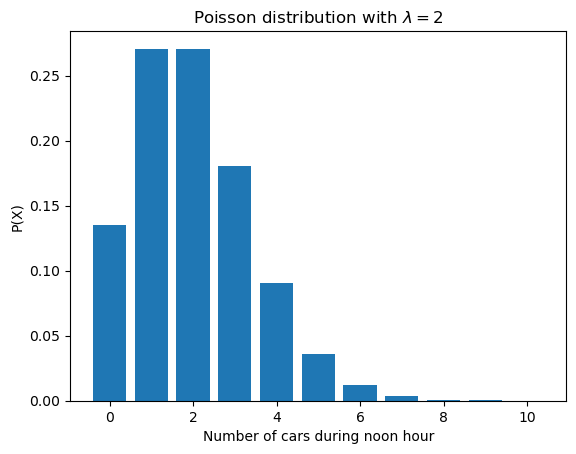

In [113]:
#number 1

# λ = \lambda + tab
λ = 2

#create np array for nums 0-11
x = np.arange(0,11)

#the probability at each of the 12 points
y = stats.poisson(λ).pmf(x)

#code to create the graph and label
plt.bar(x, y)
plt.title('Poisson distribution with $λ = 2$')
plt.xlabel('Number of cars during noon hour')
plt.ylabel('P(X)');

In [115]:
round(stats.poisson(λ).pmf(0), 2)

0.14

In [116]:
round(stats.poisson(λ).sf(2), 2)

0.32

In [117]:
round(stats.poisson(λ).sf(0), 2)

0.86

In [119]:
#number 2

mn = 3
sd = .3
grade = stats.norm(mn, sd)

In [124]:
#several different ways to do this, don't have to make a variable
stats.norm(mn, sd).isf(.05)
stats.norm(3, .3).isf(.05)
grade.isf(.05)


3.4934560880854417

In [125]:
#returns the same result doing this the opposite way
grade.ppf(.95)

3.4934560880854417

In [127]:
grade.ppf(.15)

2.689069983151863

In [128]:
grade.isf(.85)

2.689069983151863

In [130]:
#can pass a list of values to return a range
range_of_gpas = grade.ppf([.20, .30])
range_of_gpas

array([2.74751363, 2.84267985])

In [136]:
#way to basically check the above without having to manually look
(range_of_gpas[0] < 2.8) and (range_of_gpas[1] > 2.8)

True

In [137]:
#more concise way to determine if that gpa falls in the third decile (20-30)th percentiles
grade.cdf(2.8)

0.2524925375469227

In [141]:
round(grade.cdf(3.5), 2)

0.95

In [142]:
round(grade.sf(3.5), 2)

0.05

In [143]:
n_trials = 4326
p = .02

click_throughs = stats.binom(n_trials, p)

In [144]:
round(click_throughs.sf(96), 2)

0.14

In [145]:
λ = n_trials * p
λ

86.52

In [147]:
round(stats.poisson(λ).sf(96), 2)

0.14

In [150]:
n_trials = 60
p = .01

round(stats.binom(n_trials, p).sf(0), 2)

0.45

In [152]:
students = round(.9 * 22 * 3)
p = .03

59

Text(0.5, 1.0, 'Messy Breakroom?')

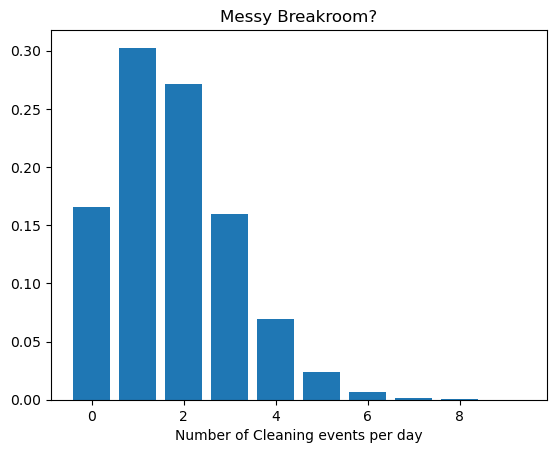

In [153]:
x = np.arange(0, 10)
y = stats.binom(students, p).pmf(x)
plt.bar(x, y)
plt.xlabel('Number of Cleaning events per day')
plt.title('Messy Breakroom?')


In [155]:
# sf.(0) because we want to find out if cleaned more than 0 times
clean = stats.binom(students, p)
round(clean.sf(0), 2)

0.83

In [156]:
two_days = students * 2
round(stats.binom(two_days, p).pmf(0), 2)

0.03

In [159]:
five_days = students * 5
stats.binom(five_days, p).pmf(0)

0.00012521651388091245

In [160]:
mean = 15 * 2 # 15 people taking 2 min each
std_dev = 3 * 2

total_lunch_time = 60 #mins
order_time = 2
eat_time = 15
cook_time = 10

max_wait = total_lunch_time - order_time - eat_time - cook_time
max_wait

33

In [162]:
round(stats.norm(mean, std_dev).cdf(max_wait), 2)

0.69